# **AP155 Lab Assignment**
## Module 4: Ordinary Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: \ Torero, William Klien B.
_Student No._:\ 2022-10739
_Section_: THV-TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Torero, William Klien B.

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: <font color='red'>**94/100**</font>

Score breakdown:
* Problem 1 - <font color='red'>**50/50**</font>
* Problem 2 - <font color='red'>**45/50**</font>

<font color=red> -1 for missing information on date and time of submission </font>

<font color='red'>**signed GC Belinario**</font>

### PROBLEM 1
**The Lotka-Volterra equations**

_Refer to Exercise 8.2 in the Newman text._ The Lotka-Volterra equations are a mathematical model of predator-prey interactions between biological species. Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called "rabbits" (the prey) and "foxes" (the predators). You could think of $x$ and $y$ as being the population in thousands, say, so that $x = 2$ means there are 2000 rabbits.

In the Lotka-Volterra model the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:

$$\frac{{\rm d}x}{{\rm d}t} = \alpha x - \beta xy,$$

where $\alpha$ and $\beta$ are constants. At the same time the foxes reproduce at a rate proportional to the rate at which they eat rabbits-- because they need food to grow and reproduce-- but also die of old age at a rate proportional to their own population:

$$\frac{{\rm d}y}{{\rm d}t}  = \gamma xy - \delta y,$$

where $\gamma$ and $\delta$ are also constants. *(25 pts.)*

1. Solve these equations using the fourth-order Runge-Kutta method for the case $\alpha = 1, \beta = \gamma = 0.5$, and $\delta = 2$, starting from the initial condition $x = y = 2$.

2. Make a graph showing both $x$ and $y$ as a function of time on the same axes from $t =0$ to $t = 30$. *(25 pts.)*

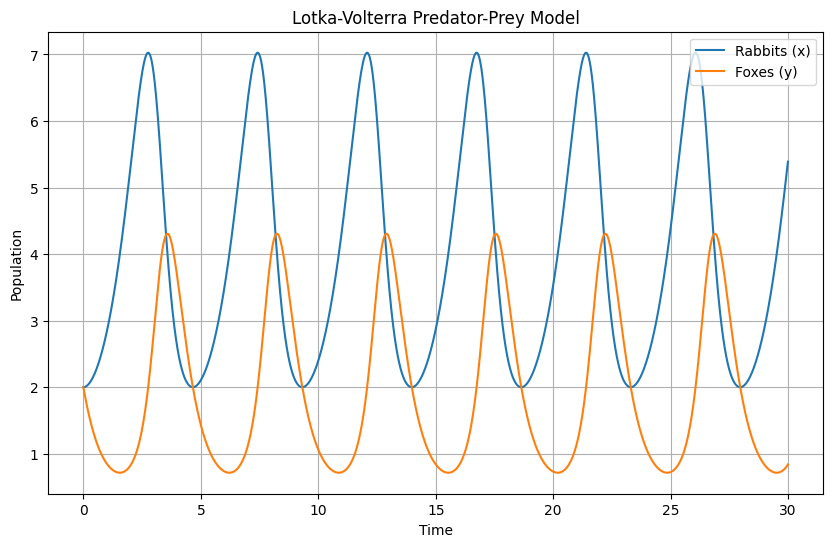

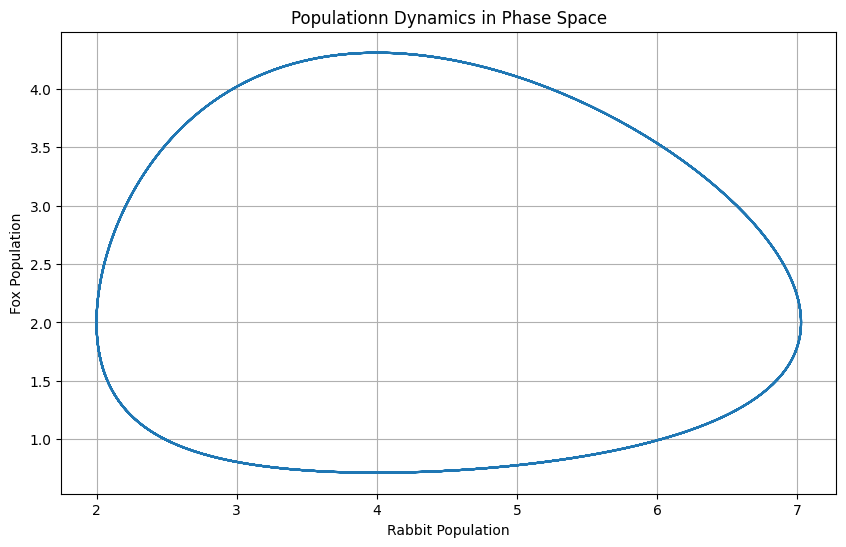

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# The given value of constants have already been substituted:
# 𝛼 = 1 - This parameter represent the growth rate of rabbits without the presence of predators
# 𝛽 = 0.5 - This parameter represents the effect of the predation of foxes to the population rabbits that decreases over time
# 𝛾 = 0.5 - This parameter represents the reproductive benefit foxes receive as they consume rabbits
# 𝛿 = 2 - This parameter represents the death rate of foxes due to natural causes like aging

a = 0.0 # Initial time where the graph will start
b = 30.0 # Final time where the graph will end
N = 3000 # Number of steps
h = (b - a) / N # Step size base on time interval and steps

r = np.array([2.0,2.0], float) # Making an array of numbers with the initial population of rabbit and fox as the input

x_values = [] # Defining an empty array to store the rabbit population
y_values = [] # Defining an empty array to store the fox population
t_values = np.arange(a, b, h) # Defining an array with values from the given time interval with increments of h

# Defining the function that will be used to solve the 4th order Runge-Kutta method
def f(r):
  x, y = r[0], r[1] # Initializing a variable for the initial population for both rabbit and fox
  f_x = 1.0 * x - 0.5 * x * y # Function for change in rabbit population
  f_y = 0.5 * x * y - 2 * y # Function for change in fox population
  return np.array([f_x, f_y], float) # Returning both functions as an array

# Defining an iteration for each time step in the time interval
for t in t_values:
  x_values.append(r[0]) # Input the initial rabbit population to x_values
  y_values.append(r[1]) # Input the initial fox population to x_values
  k1 = h * f(r) # Calculating the first RK coefficiient
  k2 = h * f(r + 0.5 * k1) # Calculating the second RK coefficiient
  k3 = h * f(r + 0.5 * k2) # Calculating the third RK coefficiient
  k4 = h * f(r + k3) # Calculating the fourth RK coefficiient
  r += (k1 + 2 * k2 + 2 * k3 + k4) / 6 # Updating the population array of x and y using the weighted average of RK coefficients

# Plotting the rabbit and fox population over time
plt.figure(figsize=(10, 6))
plt.plot(t_values, x_values, label="Rabbits (x)") # Rabbit population over time
plt.plot(t_values, y_values, label="Foxes (y)") # Fox population over time
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Lotka-Volterra Predator-Prey Model')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the relationship between rabbit and fox population in phase space
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values)
plt.xlabel('Rabbit Population')
plt.ylabel('Fox Population')
plt.title('Populationn Dynamics in Phase Space')
plt.grid(True)
plt.show()



*   Lotka-Volterra Predator-Prey Model -
    It can be seen from the graph that both population initially increases. For rabbits, due to their reproduction (𝛼𝑥). For foxes, as the population of rabbits decreases (−𝛽𝑥𝑦), the population of foxes starts to increase as they benefit from their predation of rabbits (𝛾𝑥𝑦). Eventually, the population of foxes decreases (−𝛿𝑦) because of natural causes and signals the increase in the population of rabbits because of fewer predators. Notice that the increase of population for foxes is delayed because they rely on their consumption of rabbits to eat hence they need a great amount of population for rabbits.


*   Population Dynamics in Phase Space -
    The graph shows a closed loop which indicates a limit cycle as the LVE model showcases a stable oscillation in both populations. The shape generated in the graph shows the periodic nature of the rabbit and fox population relationship, where both populations fluctuate in a cyclic manner. This corresponds to the LVE model where rabbits rise, foxes follow, then both decline and it just continues to repeat over time.




<font color=red>Correctness of Code: 25/25 </font> \
<font color=red>Discussion of Code and Results: 25/25 </font>

### PROBLEM 2

**Nonlinear pendulum**

_Refer to Exercise 8.4 in the Newman text._ Building on the results from Example 8.6, calculate the motion of a nonlinear pendulum as follows.

1. Solve the two first-order equations, Eqs. (8.45) and (8.46), using the fourth-order Runge-Kutta method for a pendulum with a 10 cm arm. Use your program to calculate the angle $\theta$ of displacement for several periods of the pendulum when it is released from a standstill at $\theta = 179^\circ$ from the vertical. *(25 pts.)*

2. Make a graph of $\theta$ as a function of time. *(25 pts.)*


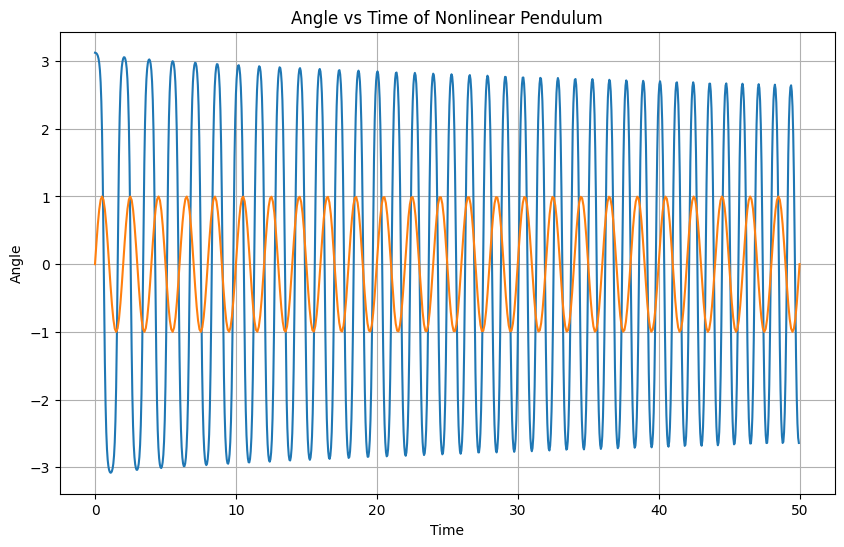

In [60]:
import numpy as np
import matplotlib.pyplot as plt

g = 9.81 # Acceleration due to gravity
L = 0.1 # Length of pendulum in meters
θ0 = 179 * np.pi / 180 # Initial value for θ in radians
ω0 = 0  # Initial value for ω

a = 0.0 # Initial time where the graph will start
b = 50 # Final time where the graph will end
N = 1000 # Number of steps
h = (b - a) / N # Step size base on time interval and steps

r = np.array([θ0, ω0], float) # Making an array of numbers with the initial values for θ and ω

θ_values = [] # Defining an empty array to store the values of θ
ω_values = [] # Defining an empty array to store the values of ω
t_values = np.arange(a, b, h) # Defining an array with values from the given time interval with increments of h

# Defining the function that will be used to solve the 4th order Runge-Kutta method
def f(r):
    θ, ω = r[0], r[1] # Initializing a variable for the initial values for θ and ω
    f_θ = ω # Function for θ
    f_ω = (-g / L) * np.sin(θ) # Function for ω
    return np.array([f_θ, f_ω], float) # Returning both functions as an array

for t in t_values:
  θ_values.append(r[0]) # Input the initial value of θ to θ_values
  ω_values.append(r[1]) # Input the initial value of ω to ω_values
  k1 = h * f(r) # Calculating the first RK coefficiient
  k2 = h * f(r + 0.5 * k1) # Calculating the second RK coefficiient
  k3 = h * f(r + 0.5 * k2) # Calculating the third RK coefficiient
  k4 = h * f(r + k3) # Calculating the fourth RK coefficiient
  r += (k1 + 2 * k2 + 2 * k3 + k4) / 6 # Updating the population array of x and y using the weighted average of RK coefficients

# Defining parameters for sine wave that will be use for comparison
x = np.linspace(0, 50, 500)
y = np.sin(x * np.pi)

# Plotting θ vs time and sine wave
plt.figure(figsize=(10, 6))
plt.plot(t_values, θ_values)
plt.plot(x, y)
plt.xlabel('Time')
plt.ylabel('Angle')
plt.title('Angle vs Time of Nonlinear Pendulum')
plt.grid(True)
plt.show()

Since the initial angle of the pendulum is relatively large (179 degrees), we expect the pendulum will undergo a very large oscillation. If we compare this to a sine wave, although it is not that obvious, it has a non-sinusoidal behavior with sharper increase and has longer period. It is also evident that the amplitude of non-linenar pendulum has an amplitude that gradually decreases which indicates the decreasing energy as time goes by. In real life pendulum, if we try to swing the pendulum at a very large angle, it will also swing at a large angle that gradually decreases in much longer time than if we try to swing it at a very small angle.

<font color='red'>Plot lacks distinction between the two graphs.</font>

<font color=red>Correctness of Code: 25/25 </font> \
<font color=red>Discussion of Code and Results: 20/25 </font>